In [42]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [111]:

destinations = ['Dubai',
                'London',
                'Paris',
                'Cancun',
                'Dominican Republic']
attributes = ['age' ,
              'gender',
              'native_language',
              'travel_with',
              'destination_type',
              'budget',
              'weather',
              'season',
              'activities',
              'technology',
              'crowd',
              'destination_language']

In [44]:
age = np.arange(0,5, 1) # ['<18', '18-25', '26-35', '36-50', '>50']
gender = np.arange(0, 3, 1) # ['M', 'F', 'X']
native_language = np.arange(0, 5, 1) # ['English', 'Spanish', 'French', 'Arabic', 'X']
travel_with = np.arange(0, 4, 1) # ['solo', 'duo', 'friends', family]
destination_type = np.arange(0, 4, 1) # [beach, culture, adventure, urban]
budget = np.arange(0, 4, 1) # [<50$, 50$-100$, 101$-200$, >200$]
weather = np.arange(0, 4, 1) # [tropical, mediterranean, temperate, cold]
season = np.arange(0, 4, 1) # [spring, summer, autumn, winter]
activities = np.arange(0, 5, 1) # [sightseeing, outdoor, cultural, shopping, nightlife]
technology = np.arange(0, 5, 1) # [very reliant, reliant, neutral, not very reliant, not reliant at all]
crowd = np.arange(0, 5, 1) # [crowded,somewhat crowded, neutral, somewhat quieter, quiet]
destination_language = np.arange(0, 3, 1) # [native, neutral, different]

In [45]:
# Sample data
features = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Feature 1 to Feature 12 values for each survey response
            [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
            # Add more rows for additional survey responses
            ]
outputs = [0, 1, 0, 1, 0]  # Replace with your actual output values (0 or 1)

In [84]:
# Fuzzy logic variables
feature1 = ctrl.Antecedent(age, 'age')
feature2 = ctrl.Antecedent(gender, 'gender')
feature3 = ctrl.Antecedent(native_language, 'native_language')
feature4 = ctrl.Antecedent(travel_with, 'travel_with')
feature5 = ctrl.Antecedent(destination_type, 'destination_type')
feature6 = ctrl.Antecedent(budget, 'budget')
feature7 = ctrl.Antecedent(weather, 'weather')
feature8 = ctrl.Antecedent(season, 'season')
feature9 = ctrl.Antecedent(activities, 'activities')
feature10 = ctrl.Antecedent(technology, 'technology')
feature11 = ctrl.Antecedent(crowd, 'crowd')
feature12 = ctrl.Antecedent(destination_language, 'destination_language')
output = ctrl.Consequent(np.arange(0, 5, 1), 'Output') # Dubai, London, Paris, Cancun, Dominican Republic

In [85]:
# Define membership functions
# age
feature1['low'] = fuzz.trimf(feature1.universe, [0, 0, 2])
feature1['medium'] = fuzz.trimf(feature1.universe, [0, 2, 4])
feature1['high'] = fuzz.trimf(feature1.universe, [2, 4, 4])
# gender
feature2.automf(names=['M', 'F', 'X'])
#native_language
feature3.automf(names=['English', 'Spanish', 'French', 'Arabic', 'X'])
# travel_with
feature4.automf(names=['solo', 'duo', 'friends', 'family'])
# destination_type
feature5.automf(names=['beach', 'culture', 'adventure', 'urban'])
# budget
feature6['low'] = fuzz.trimf(feature6.universe, [0, 0, 1.5])
feature6['medium'] = fuzz.trimf(feature6.universe, [0, 1.5, 3])
feature6['high'] = fuzz.trimf(feature6.universe, [1.5, 3, 3])
# weather
feature7.automf(names=['tropical', 'mediterranean', 'temperate', 'cold'])
# season
feature8.automf(names=['spring', 'summer', 'autumn', 'winter'])
# activities
feature9.automf(names=['sightseeing', 'outdoor', 'cultural', 'shopping', 'nightlife'])
# technology
feature10['low'] = fuzz.trimf(feature10.universe, [0, 0, 2])
feature10['medium'] = fuzz.trimf(feature10.universe, [0, 2, 4])
feature10['high'] = fuzz.trimf(feature10.universe, [2, 4, 4])
# crowd
feature11['low'] = fuzz.trimf(feature11.universe, [0, 0, 2])
feature11['medium'] = fuzz.trimf(feature11.universe, [0, 2, 4])
feature11['high'] = fuzz.trimf(feature11.universe, [2, 4, 4])
# destination_language
feature12.automf(names=['native', 'neutral', 'different'])

output.automf(names=['Dubai', 'London', 'Paris', 'Cancun', 'Dominican Republic'])

In [49]:
features_list = [feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12]
#for name in features_list:
    #print(name.view())

In [103]:
# Rule base
# Language
rule1 = ctrl.Rule(((feature3['Arabic'] & feature12['native']) |
                  (feature3['French'] & feature12['different']) |
                  (feature3['Spanish'] & feature12['different']) |
                  (feature3['English'] & feature12['different'])),
                  output['Dubai'], label='rule language Dubai')
rule2 = ctrl.Rule(((feature3['French'] & feature12['native']) |
                  (feature3['Arabic'] & feature12['different']) |
                  (feature3['Spanish'] & feature12['different']) |
                  (feature3['English'] & feature12['different'])),
                  output['Paris'], label='rule language Paris')
rule3 = ctrl.Rule(((feature3['Spanish'] & feature12['native']) |
                  (feature3['French'] & feature12['different']) |
                  (feature3['Arabic'] & feature12['different']) |
                  (feature3['English'] & feature12['different'])),
                  output['Cancun'], label='rule language Cancun')
rule4 = ctrl.Rule(((feature3['Spanish'] & feature12['native']) |
                  (feature3['French'] & feature12['different']) |
                  (feature3['Arabic'] & feature12['different']) |
                  (feature3['English'] & feature12['different'])),
                  output['Dominican Republic'], label='rule language Dominican Republic')
rule5 = ctrl.Rule(((feature3['English'] & feature12['native']) |
                  (feature3['French'] & feature12['different']) |
                  (feature3['Arabic'] & feature12['different']) |
                  (feature3['Arabic'] & feature12['different'])),
                  output['London'], label='rule language London')

# Destination type [beach, culture, adventure, urban], weather [tropical, mediterranean, temperate, cold], season [spring, summer, autumn, winter]
rule6 = ctrl.Rule(((feature5['culture'] & feature7['cold'] & feature8['winter']) |
                   (feature5['urban'] & feature7['cold'] & feature8['winter']) |
                   (feature5['culture'] & feature7['temperate'] & feature8['summer']) |
                   (feature5['urban'] & feature7['temperate'] & feature8['summer'])),
                  output['London'], label='rule dest_type London')
rule7 = ctrl.Rule(((feature5['culture'] & feature7['temperate'] & feature8['winter']) |
                   (feature5['urban'] & feature7['temperate'] & feature8['winter']) |
                   (feature5['culture'] & feature7['temperate'] & feature8['summer']) |
                   (feature5['urban'] & feature7['temperate'] & feature8['summer'])),
                  output['Paris'], label='rule dest_type Paris')
rule8 = ctrl.Rule(((feature5['culture'] & feature7['mediterranean'] & feature8['winter']) |
                   (feature5['urban'] & feature7['mediterranean'] & feature8['winter']) |
                   (feature5['culture'] & feature7['mediterranean'] & feature8['summer']) |
                   (feature5['urban'] & feature7['mediterranean'] & feature8['summer']) |
                   (feature5['beach'] & feature7['mediterranean'] & feature8['winter'])),
                  output['Dubai'], label='rule dest_type Dubai')
rule9 = ctrl.Rule(((feature5['adventure'] & feature7['mediterranean'] & feature8['winter']) |
                   (feature5['beach'] & feature7['mediterranean'] & feature8['winter']) |
                   (feature5['adventure'] & feature7['tropical'] & feature8['summer']) |
                   (feature5['beach'] & feature7['tropical'] & feature8['summer'])),
                  output['Cancun'], label='rule dest_type Cancun')
rule10 = ctrl.Rule(((feature5['adventure'] & feature7['tropical'] & feature8['winter']) |
                   (feature5['beach'] & feature7['tropical'] & feature8['winter']) |
                   (feature5['adventure'] & feature7['tropical'] & feature8['summer']) |
                   (feature5['beach'] & feature7['tropical'] & feature8['summer'])),
                  output['Dominican Republic'], label='rule dest_type Dominican Republic')

# Activities [sightseeing, outdoor, cultural, shopping, nightlife] (9), budget [<50$, 50$-100$, 101$-200$, >200$] (6)
rule11 = ctrl.Rule(((feature9['shopping'] & feature6['low']) |
                    (feature9['nightlife'] & feature6['medium']) |
                    (feature9['cultural'] & feature6['low'])),
                   output['Paris'], label='activities/budget Paris')
rule12 = ctrl.Rule(((feature9['outdoor'] & feature6['medium']) |
                    (feature9['sightseeing'] & feature6['medium']) |
                    (feature9['cultural'] & feature6['medium'])),
                   output['Cancun'], label='activities/budget Cancun')
rule13 = ctrl.Rule(((feature9['nightlife'] & feature6['high']) |
                    (feature9['sightseeing'] & feature6['high']) |
                    (feature9['cultural'] & feature6['high']) |
                    (feature9['shopping'] & feature6['high'])),
                   output['Dubai'], label='activities/budget Dubai')
rule14 = ctrl.Rule(((feature9['nightlife'] & feature6['low']) |
                    (feature9['sightseeing'] & feature6['low']) |
                    (feature9['cultural'] & feature6['low']) |
                    (feature9['shopping'] & feature6['low'])),
                   output['London'], label='activities/budget London')
rule15 = ctrl.Rule(((feature9['outdoor'] & feature6['high']) |
                    (feature9['sightseeing'] & feature6['medium']) |
                    (feature9['cultural'] & feature6['medium'])),
                   output['Dominican Republic'], label='activities/budget Dominican Republic')

#rule40 = ctrl.Rule(feature1['medium'] | feature2['medium'], output['high'])
#rule41 = ctrl.Rule(feature1['high'] | feature2['high'], output['low'])

In [104]:
response = pd.read_csv('Travel Destination.csv')
responses = [[1, 1, 2, 3, 0, 1, 2, 0, 1, 3, 1, 0],
             [0, 1, 1, 2, 1, 2, 1, 2, 0, 3, 1, 0]]

In [116]:
# Create fuzzy system
fuzzy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_system = ctrl.ControlSystemSimulation(fuzzy_ctrl)

# Run the system for each set of features
for i in range(len(responses)):
    #fuzzy_system.input['age'] = responses[i][0]
    #fuzzy_system.input['gender'] = responses[i][1]
    fuzzy_system.input['native_language'] = responses[i][2]
    #fuzzy_system.input['travel_with'] = responses[i][3]
    fuzzy_system.input['destination_type'] = responses[i][4]
    fuzzy_system.input['budget'] = responses[i][5]
    fuzzy_system.input['weather'] = responses[i][6]
    fuzzy_system.input['season'] = responses[i][7]
    fuzzy_system.input['activities'] = responses[i][8]
    #fuzzy_system.input['technology'] = responses[i][9]
    #fuzzy_system.input['crowd'] = responses[i][10]
    fuzzy_system.input['destination_language'] = responses[i][11]

    # Compute the fuzzy output
    fuzzy_system.compute()

    # Get the crisp output (defuzzification)
    fuzzy_output = fuzzy_system.output['Output']
    # Get the destinations in order
    results = []
    for name in output.terms:
        results.append(fuzz.interp_membership(output.universe, output[name].mf, fuzzy_output))
    result_destination = dict(sorted(dict(zip(destinations, results)).items(), key=lambda item: item[1], reverse=True))

    print(f"Survey Response {i + 1}: Fuzzy Output = {result_destination}")




Survey Response 1: Fuzzy Output = {'Paris': 0.5376344086021505, 'Cancun': 0.4623655913978495, 'Dubai': 0.0, 'London': 0.0, 'Dominican Republic': 0.0}
Survey Response 2: Fuzzy Output = {'Cancun': 0.7847222222222223, 'Paris': 0.21527777777777768, 'Dubai': 0.0, 'London': 0.0, 'Dominican Republic': 0.0}


/Users/michelefischer/FuzzySet/venv/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


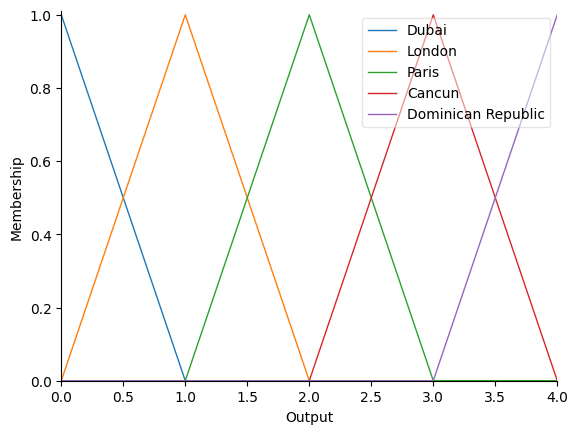

In [41]:
output.view()